# Imports

In [1]:
## Imports
import pandas as pd
import numpy as np 
import datadotworld as dw
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display
import sys
import os
%matplotlib inline

# Data Processing

In [2]:
## Change working directory to read in data
os.chdir(str(Path(os.getcwd()).parent / 'Data'))

In [3]:
## Read In
graph_data = pd.read_csv('graph_data.csv')

In [4]:
## Rename Columns
graph_data.rename(columns={'SPM5':'first_time_homeless', 'SPM7':'exited_to_temporary', 'spm0_coc_award_amount':'award_amount'}, inplace=True)

In [5]:
## Get 2nd CoC Category...More General Categories
coc_map = {'Suburban CoCs':'Non Urban CoCs', 'Rural CoCs':'Non Urban CoCs', 'Other Urban CoCs':'Urban CoCs', 'Major Cities':'Urban CoCs'}
graph_data['coc_category_2'] = graph_data['coc_category'].map(coc_map)

In [74]:
## Make New "Return Rate" Variable by taking the radio between Total Returns and HMNIS Count
graph_data['Return_Rate'] = graph_data['total_returns'] / graph_data['HMIS Count']

# Plots!!

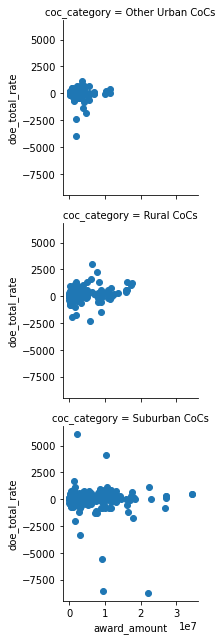

In [6]:
## Look at Award Amount vs. Doe Total Rate over COC Categories
g = sns.FacetGrid(data=graph_data.query("coc_category != 'Major Cities'"), row='coc_category')
g.map(plt.scatter,'award_amount','doe_total_rate')

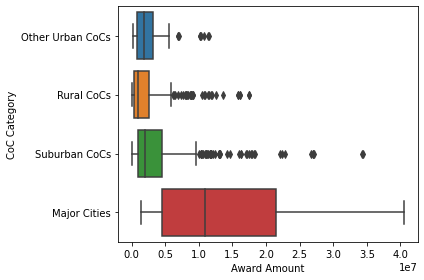

In [9]:
## Boxplot 1 - Award Amount Over CoC Category
g = sns.boxplot(x='award_amount', y = 'coc_category', data=graph_data.query('award_amount < 50000000'))
g.set(xlabel='Award Amount', ylabel = 'CoC Category')
plt.tight_layout()
#g.set_yticklabels(g.get_yticklabels(), rotation=-60)
fig = g.get_figure()
#fig.savefig('CoC_Category_x_Award_Amount.png')

In [60]:
## Clean Up A little for Categorical Plots
cat_graph_data = graph_data[graph_data['Return_Rate'].replace(np.inf, np.nan).fillna(0) > 0].reset_index(drop=True).copy()

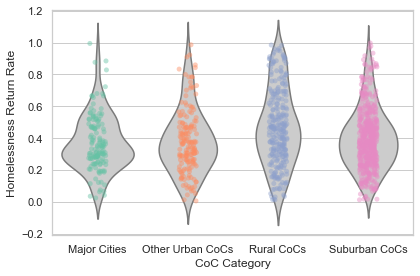

In [105]:
## Look At Distributuib if Return Rate
sns.set(style="whitegrid")
fig = plt.figure()
g = sns.violinplot(x='coc_category', y='Return_Rate', data=cat_graph_data.query('Return_Rate < 1'),  inner=None, color=".8", order = ['Major Cities', 'Other Urban CoCs', 'Rural CoCs', 'Suburban CoCs'])
g = sns.stripplot(x='coc_category', y='Return_Rate', data=cat_graph_data.query('Return_Rate < 1'),  palette="Set2",edgecolor="gray", alpha=.45, order = ['Major Cities', 'Other Urban CoCs', 'Rural CoCs', 'Suburban CoCs'])
g.set(xlabel='CoC Category', ylabel = 'Homelessness Return Rate')
plt.tight_layout()
fig.savefig('coc_category_x_homelessness_return_rate_dist.png')

## Try Normalizing Award Amount

In [151]:
coc

'Other Urban CoCs'

In [157]:
stat_dict = {}
for coc in cat_graph_data['coc_category'].unique():
    stat_dict[coc] = {
        'mean':cat_graph_data.query("coc_category == '{}'".format(coc))['award_amount'].mean(),
        'std':cat_graph_data.query("coc_category == '{}'".format(coc))['award_amount'].std()
    }

In [158]:
stat_dict

{'Other Urban CoCs': {'mean': 2359322.7011494255, 'std': 2152958.292176143},
 'Rural CoCs': {'mean': 2352024.318936877, 'std': 3355599.7780428757},
 'Suburban CoCs': {'mean': 3840343.553149606, 'std': 4842288.140226708},
 'Major Cities': {'mean': 19195756.085106384, 'std': 22677458.16936793}}

In [163]:
for i, row in cat_graph_data.iterrows():
    cat_graph_data.loc[i, 'Normalized Award']= (row['award_amount']-stat_dict[row['coc_category']]['mean']) / stat_dict[row['coc_category']]['std']

In [165]:
cat_graph_data['Normalized Award']

0       0.226560
1      -0.469520
2       1.088100
3       0.643423
4      -0.793938
5      -0.180384
6      -0.997439
7      -0.371631
8       0.347684
9      -0.935410
10     -0.581378
11     -0.624161
12      0.455463
13     -0.476245
14      0.261651
15      0.093033
16      0.940873
17      0.667360
18      0.017784
19     -0.127539
20      2.146525
21     -0.163685
22      0.073351
23     -0.265223
24     -0.232978
25     -0.145612
26      0.894745
27      1.536425
28     -0.047322
29     -0.444128
          ...   
1094   -0.775817
1095   -0.590928
1096   -0.159496
1097   -0.558112
1098   -0.599934
1099   -0.586027
1100   -0.736689
1101   -0.460126
1102    0.046612
1103    0.936116
1104   -0.758448
1105   -0.721019
1106   -0.684219
1107    0.262142
1108   -0.614319
1109    0.714077
1110    1.154832
1111    0.679634
1112   -0.080788
1113    0.838546
1114   -0.479692
1115    1.913536
1116   -0.399862
1117   -0.575102
1118    0.591767
1119   -0.578106
1120   -0.043551
1121   -0.5403

In [175]:
cat_graph_data.columns

Index(['Year', 'State', 'coc_number', 'award_amount', 'HMIS Count',
       'SPM4 Stayers', 'SPM4 Leavers', 'first_time_homeless',
       'exited_to_temporary', 'coc_category', 'total_returns',
       '0_to_6_month_returns', '6_to_12_month_returns',
       '12_to_24_month_returns', 'doe_total_rate', 'doe_unsheltered_rate',
       'doe_sheltered_rate', 'doe_hotel_motel_rate', 'doe_doubled_up_rate',
       'coc_category_2', 'Return_Rate', 'Normalized Award'],
      dtype='object')

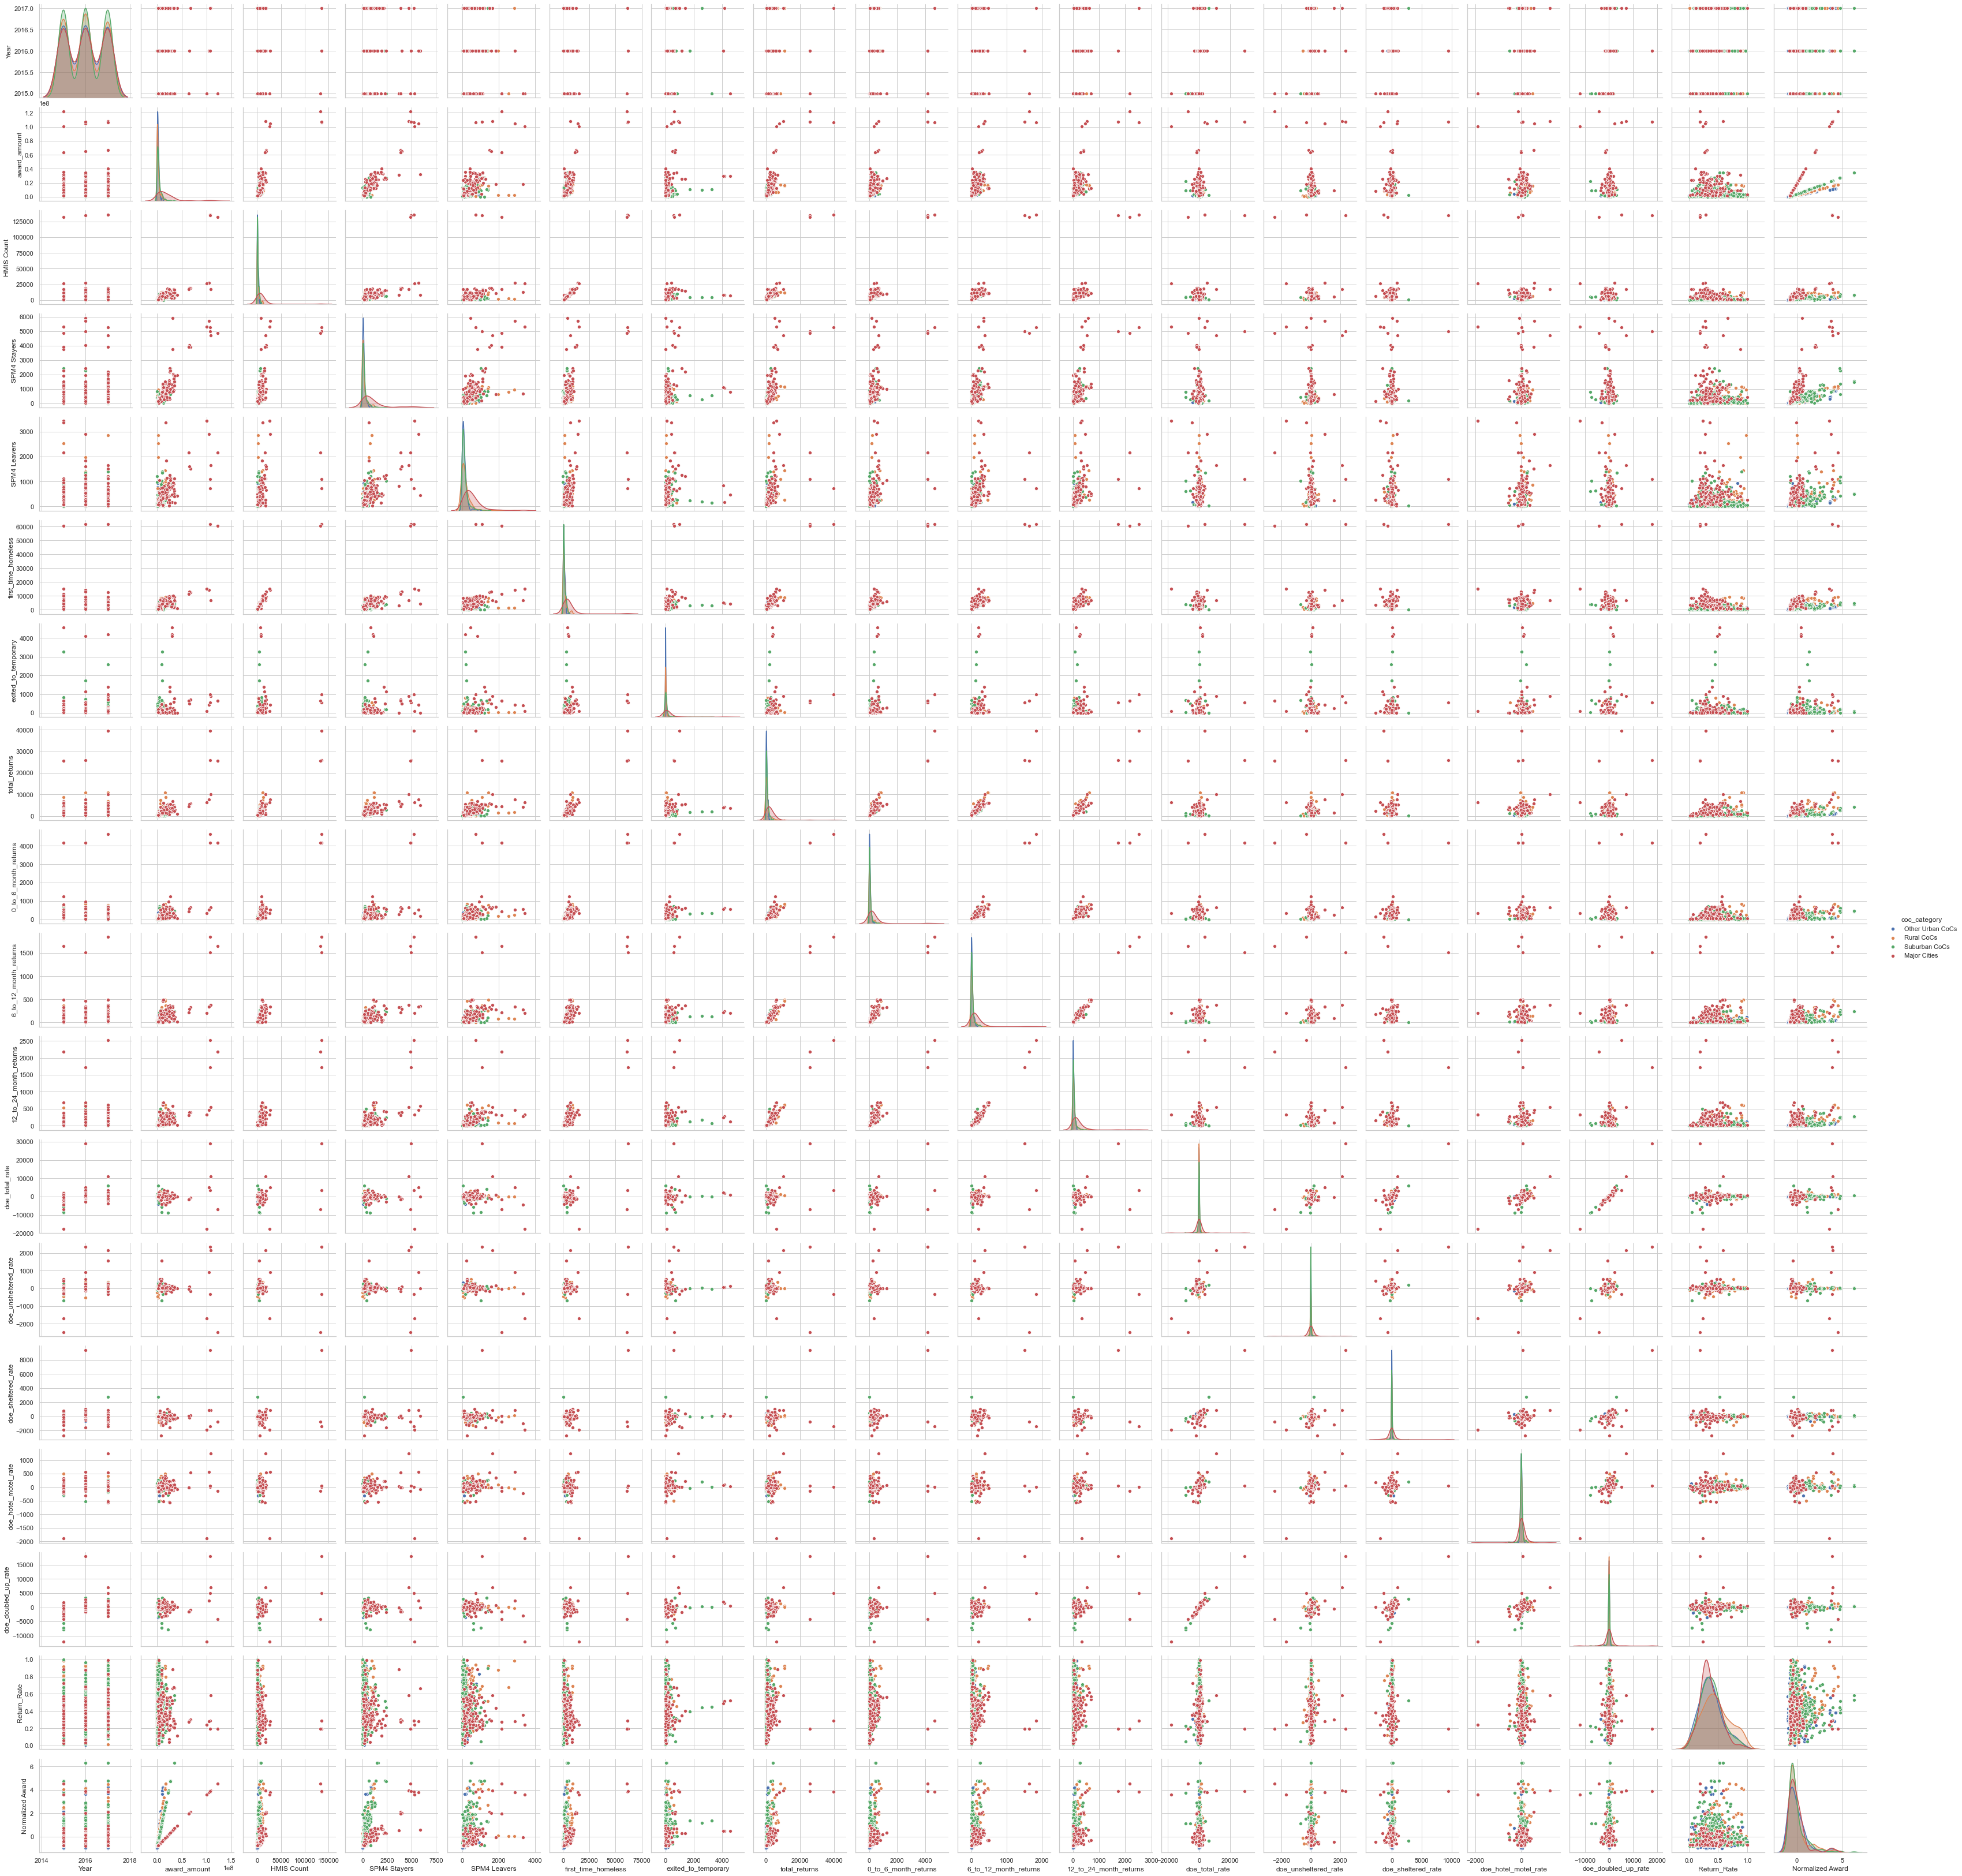

In [185]:
g = sns.pairplot(cat_graph_data.query("Return_Rate < 1"), hue='coc_category')

In [ ]:
g = sns.FacetGrid(return_rate_by_year_1, col ='coc_category_2', col_order=['Urban CoCs', 'Non Urban CoCs'])
g = g.map(plt.plot, 'Year', 'Return_Rate' ,marker='.')
axes = g.axes.flatten()
axes[0].set_title('Urban CoCs')
axes[1].set_title('Non-Urban CoCs')
g.set(xticks = [2015, 2016, 2017])
plt.tight_layout()
#g.savefig('Year_x_Homelessness_Return_Rate_CoC_category_1.png')

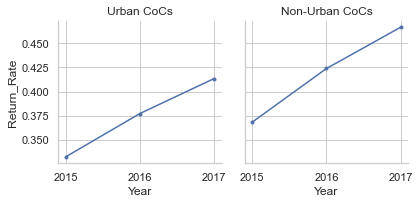

In [140]:
## Return Rate by Year - CoC Categories - 1
g = sns.FacetGrid(return_rate_by_year_1, col ='coc_category_2', col_order=['Urban CoCs', 'Non Urban CoCs'])
g = g.map(plt.plot, 'Year', 'Return_Rate' ,marker='.')
axes = g.axes.flatten()
axes[0].set_title('Urban CoCs')
axes[1].set_title('Non-Urban CoCs')
g.set(xticks = [2015, 2016, 2017])
plt.tight_layout()
#g.savefig('Year_x_Homelessness_Return_Rate_CoC_category_1.png')

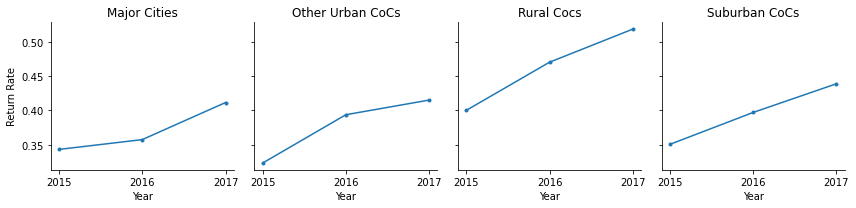

In [188]:
## Return Rate by Year - Coc Categories - 2
g = sns.FacetGrid(return_rate_by_year_2, col ='coc_category' )
g = g.map(plt.plot, 'Year', 'Return_Rate' ,marker='.')
axes = g.axes.flatten()
axes[0].set_title('Major Cities')
axes[1].set_title('Other Urban CoCs')
axes[2].set_title('Rural Cocs')
axes[3].set_title('Suburban CoCs')
g.set(xticks = [2015, 2016, 2017])
plt.tight_layout()
#g.savefig('Year_x_Homelessness_Return_Rate_CoC_category_2.png')

### Sum Variables over Year and CoC Category - 1 

In [9]:
## Get Sum of Variables by Year
sum_by_year_by_cat = graph_data.query("Return_Rate < 1").groupby(['Year', 'coc_category']).sum().reset_index()
## First Time Homeless Rate by Coc Category
sum_by_year_by_cat['first_time_homeless_rate'] = sum_by_year_by_cat['first_time_homeless'] / sum_by_year_by_cat['HMIS Count']
## Get  Year, CoC Category, HMIS, First Time Homeless
sum_hmis_ft_by_year = sum_by_year_by_cat[['Year', 'coc_category', 'HMIS Count','first_time_homeless']]
sum_hmis_ft_by_year

## Get Totals
totals = sum_hmis_ft_by_year.groupby('Year').sum().reset_index()
totals.insert(1, 'coc_category', ['Total']*3)

## Final Total CoC Counts + Total First Time Homeless by Year and CoC Category
total_hmis_fth_final = sum_hmis_ft_by_year.append(totals).sort_values(by=['Year', 'coc_category']).reset_index(drop=True)

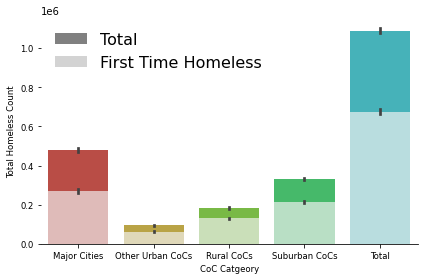

In [285]:
## Proportion of Total Homelessness / First Time Homelessness 2015-2017 
fig = plt.figure()
top_plot = sns.barplot(x = 'coc_category', y = "HMIS Count", data=total_hmis_fth_final, palette=sns.hls_palette(8, l=.5, s=.6))
bottom_plot = sns.barplot(x = "coc_category", y = 'first_time_homeless', data=total_hmis_fth_final,palette=sns.hls_palette(8, l=.8, s=.5))

topbar = plt.Rectangle((0,0),1,1,fc="#808080", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#D3D3D3',  edgecolor = 'none')
l = plt.legend([topbar,bottombar], ['Total', 'First Time Homeless'], loc=2, ncol = 1, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_xlabel("CoC Catgeory")
bottom_plot.set_ylabel("Total Homeless Count")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(8.5)
plt.tight_layout()
fig.savefig('Total_Homeless_x_CoC_category.png')

In [10]:
## Get  Year, CoC Category, HMIS, First Time Homeless
sum_doe_ft_by_year = sum_by_year_by_cat[['Year', 'coc_category','award_amount', 'doe_total_rate','first_time_homeless']]
sum_doe_ft_by_year

## Get Totals
totals = sum_doe_ft_by_year.groupby('Year').sum().reset_index()
totals.insert(1, 'coc_category', ['Total']*3)

## Final Total CoC Counts + Total First Time Homeless by Year and CoC Category
total_doe_ft_final = sum_doe_ft_by_year.append(totals).sort_values(by=['Year', 'coc_category']).reset_index(drop=True)

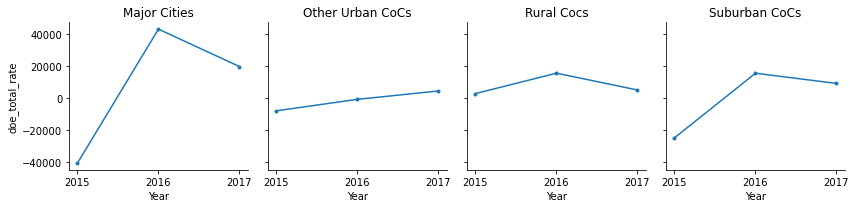

In [31]:
## Total DOE Rate - Coc Categories - 2
g = sns.FacetGrid(total_doe_ft_final.query("coc_category != 'Total'"), col ='coc_category' )
g = g.map(plt.plot, 'Year', 'doe_total_rate' ,marker='.')
axes = g.axes.flatten()
axes[0].set_title('Major Cities')
axes[1].set_title('Other Urban CoCs')
axes[2].set_title('Rural Cocs')
axes[3].set_title('Suburban CoCs')
g.set(xticks = [2015, 2016, 2017])
plt.tight_layout()
g.savefig('Year_x_Homelessness_Return_Rate_CoC_category_2.png')

### Sum Variables over Year and CoC Category - 2 

In [11]:
graph_data

,Year,State,coc_number,award_amount,HMIS Count,SPM4 Stayers,SPM4 Leavers,first_time_homeless,exited_to_temporary,coc_category,...,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,coc_category_2,Return_Rate
0,2017,AK,AK-500,2847097.0,5236.0,76.0,106.0,2985.0,76.0,Other Urban CoCs,...,131,40,65,-429.0,13.0,-365.0,-70.0,-7.0,Urban CoCs,0.190604
1,2017,AK,AK-501,776502.0,2453.0,70.0,38.0,1627.0,1.0,Rural CoCs,...,13,11,10,-485.0,-25.0,-218.0,-51.0,-206.0,Non Urban CoCs,0.110885
2,2017,AL,AL-500,9109238.0,4150.0,564.0,294.0,2571.0,118.0,Suburban CoCs,...,205,98,89,-8.0,18.0,34.0,39.0,46.0,Non Urban CoCs,0.177349
3,2017,AL,AL-501,3744586.0,2294.0,127.0,93.0,1541.0,20.0,Other Urban CoCs,...,25,19,6,1177.0,9.0,-31.0,7.0,1183.0,Urban CoCs,0.095902
4,2017,AL,AL-502,447309.0,0.0,91.0,106.0,0.0,0.0,Rural CoCs,...,0,0,0,-21.0,-13.0,5.0,2.0,-19.0,Non Urban CoCs,NaN
5,2017,AL,AL-503,650007.0,356.0,40.0,27.0,269.0,6.0,Other Urban CoCs,...,12,5,10,-41.0,15.0,54.0,-37.0,136.0,Urban CoCs,0.730337
6,2017,AL,AL-504,1970964.0,1429.0,49.0,16.0,967.0,1.0,Other Urban CoCs,...,51,21,26,346.0,-4.0,26.0,-2.0,327.0,Urban CoCs,0.328202
7,2017,AL,AL-506,211879.0,375.0,5.0,0.0,234.0,0.0,Other Urban CoCs,...,7,8,8,20.0,-11.0,-11.0,0.0,31.0,Urban CoCs,0.568000
8,2017,AL,AL-507,1104980.0,75.0,42.0,37.0,41.0,10.0,Rural CoCs,...,2,0,2,314.0,94.0,45.0,26.0,56.0,Non Urban CoCs,0.106667
9,2017,AR,AR-500,3107871.0,1545.0,321.0,124.0,1167.0,0.0,Other Urban CoCs,...,47,27,56,177.0,-2.0,-14.0,22.0,42.0,Urban CoCs,0.495793


In [12]:
## Get Sum of Variables by Year
sum_by_year_by_cat = graph_data.query("Return_Rate < 1").groupby(['Year', 'coc_category_2']).sum().reset_index()
## First Time Homeless Rate by Coc Category
sum_by_year_by_cat['first_time_homeless_rate'] = sum_by_year_by_cat['first_time_homeless'] / sum_by_year_by_cat['HMIS Count']
## Get  Year, CoC Category, HMIS, First Time Homeless
sum_hmis_ft_by_year = sum_by_year_by_cat[['Year', 'coc_category_2', 'HMIS Count','first_time_homeless']]
sum_hmis_ft_by_year

## Get Totals
totals = sum_hmis_ft_by_year.groupby('Year').sum().reset_index()
totals.insert(1, 'coc_category_2', ['Total']*3)

## Final Total CoC Counts + Total First Time Homeless by Year and CoC Category
total_hmis_fth_final = sum_hmis_ft_by_year.append(totals).sort_values(by=['Year', 'coc_category_2']).reset_index(drop=True)

In [13]:
## Get  Year, CoC Category, HMIS, First Time Homeless
sum_doe_ft_by_year = sum_by_year_by_cat[['Year', 'coc_category_2','award_amount', 'doe_total_rate','first_time_homeless']]
sum_doe_ft_by_year

## Get Totals
totals = sum_doe_ft_by_year.groupby('Year').sum().reset_index()
totals.insert(1, 'coc_category_2', ['Total']*3)

## Final Total CoC Counts + Total First Time Homeless by Year and CoC Category
total_doe_ft_final = sum_doe_ft_by_year.append(totals).sort_values(by=['Year', 'coc_category_2']).reset_index(drop=True)

In [14]:
total_doe_ft_final

,Year,coc_category_2,award_amount,doe_total_rate,first_time_homeless
0,2015,Non Urban CoCs,8.450753e+08,-22012.0,342475.0
1,2015,Total,1.877716e+09,-70659.0,677029.0
2,2015,Urban CoCs,1.032641e+09,-48647.0,334554.0
3,2016,Non Urban CoCs,8.720272e+08,31229.0,346794.0
4,2016,Total,1.899312e+09,73722.0,687694.0
5,2016,Urban CoCs,1.027285e+09,42493.0,340900.0
6,2017,Non Urban CoCs,8.717596e+08,14314.0,336410.0
7,2017,Total,1.916625e+09,38573.0,662073.0
8,2017,Urban CoCs,1.044866e+09,24259.0,325663.0


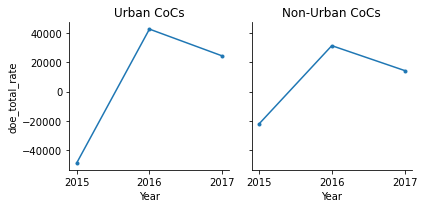

In [41]:
## Total DOE Rate - Coc Categories - 2
g = sns.FacetGrid(total_doe_ft_final.query("coc_category_2 != 'Total'"), col ='coc_category_2', col_order=['Urban CoCs', 'Non Urban CoCs'])
g = g.map(plt.plot, 'Year', 'doe_total_rate' ,marker='.')
axes = g.axes.flatten()
axes[0].set_title('Urban CoCs')
axes[1].set_title('Non-Urban CoCs')
g.set(xticks = [2015, 2016, 2017])
plt.tight_layout()
g.savefig('plots\Year_x_doe_total_CoC_category_2.png')

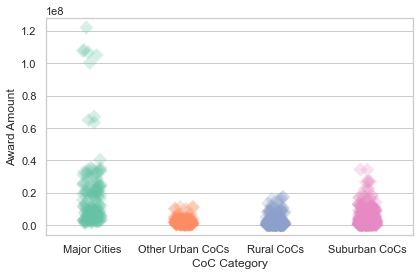

In [207]:
fig = plt.figure()
ax = sns.stripplot(x='coc_category', y='award_amount', data=cat_graph_data, palette="Set2", size=10, marker="D",edgecolor="gray", alpha=.25, order = ['Major Cities', 'Other Urban CoCs', 'Rural CoCs', 'Suburban CoCs'])
ax.set(xlabel='CoC Category', ylabel = 'Award Amount')
plt.tight_layout()
fig.savefig(r"C:\Users\danny\Documents\Projects\Homelessness\website\src\assets\coc_category_x_award_amount_1.png")

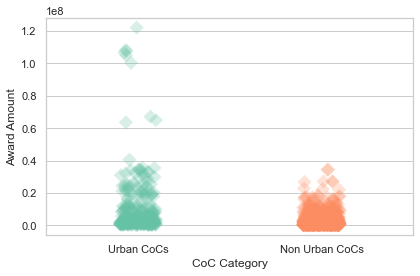

In [209]:
fig = plt.figure()
ax = sns.stripplot(x='coc_category_2', y='award_amount', data=cat_graph_data, palette="Set2", size=10, marker="D",edgecolor="gray", alpha=.25)
ax.set(xlabel='CoC Category', ylabel = 'Award Amount')
plt.tight_layout()
fig.savefig(r"C:\Users\danny\Documents\Projects\Homelessness\website\src\assets\coc_category_x_award_amount_2.png")